In [1]:
import pandas as pd
import joblib

In [2]:
from matplotlib import pyplot
import seaborn as sns 

In [5]:
df = pd.read_csv('diabetes_csv.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [6]:
class_map = {
    'tested_positive': 1,
    'tested_negative': 0
}

df['class'] = df['class'].map(class_map)

In [7]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

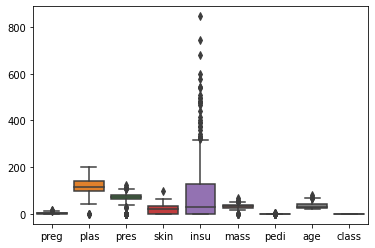

In [8]:
sns.boxplot(data=df)

In [9]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [10]:
threshold = 3
print(np.where(z > 3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int32), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int32))


In [12]:
# First array contains list of rows while the second contains list of column
print(z[55][1])

1.498962104903294


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

preg       5.0000
plas      41.2500
pres      18.0000
skin      32.0000
insu     127.2500
mass       9.3000
pedi       0.3825
age       17.0000
class      1.0000
dtype: float64

In [14]:
# Code to detect outliers now
print(df < (Q1 - 1.5 * IQR ) | (df > (Q3 + 1.5 * IQR)))

      preg   plas   pres   skin   insu   mass   pedi    age  class
0    False  False  False  False   True  False   True  False  False
1    False  False  False  False   True  False   True  False   True
2    False  False  False   True   True  False   True  False  False
3    False  False  False  False  False  False   True  False   True
4     True  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
763  False  False  False  False  False  False   True  False   True
764  False  False  False  False   True  False   True  False   True
765  False  False  False  False  False  False   True  False   True
766  False  False  False   True   True  False   True  False  False
767  False  False  False  False   True  False   True  False   True

[768 rows x 9 columns]


In [15]:
# whereever you see true in the code above signifies the presence of outliers

In [17]:
df =  df[ ~ (( df < (Q1 - 1.5 * IQR )) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


<AxesSubplot:>

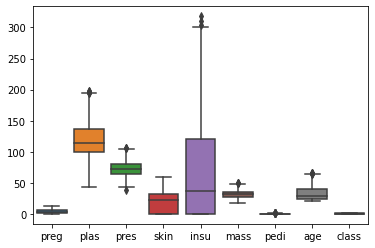

In [19]:
sns.boxplot(data=df)

In [20]:
X = df.drop('class', axis=1)
y = df['class']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
log_reg = LogisticRegression()
log_reg.fit(X, y)

svc = SVC()
svc.fit(X,y)

gnb = GaussianNB()
gnb.fit(X,y)

GaussianNB()

In [34]:
log_reg_score = round(log_reg.score(X,y) * 100 , 2 )
svc_score = round(svc.score(X,y) * 100 , 2 )
gnb_score = round(gnb.score(X,y) * 100 , 2 )

In [55]:
print(log_reg.predict(X))
print("Logistic regression score: {0} svm {1} and Gaussian prediction score is {2}".format(log_reg_score, svc_score, gnb_score))

[1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 

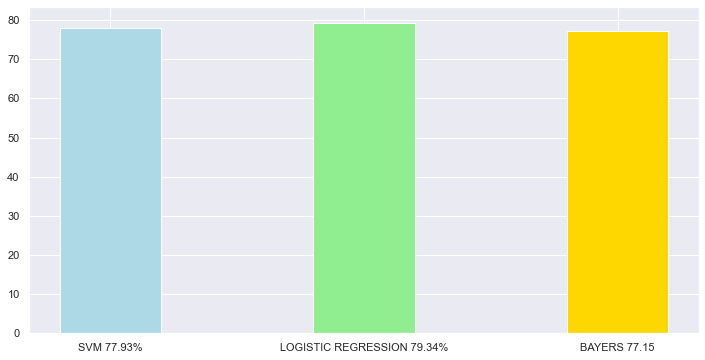

In [67]:
import seaborn as sns
sns.set();
fig = pyplot.figure(figsize=(12,6))
data = {
    'SVM {0}%'.format(svc_score): svc_score,
    'LOGISTIC REGRESSION {0}%'.format(log_reg_score): log_reg_score,
    'BAYERS {0}'.format(gnb_score): gnb_score
}

values = list(data.keys())
var = list(data.values())

pyplot.bar(values, var, color = ['lightblue', 'lightgreen', 'gold'], width = 0.4)
pyplot.show()

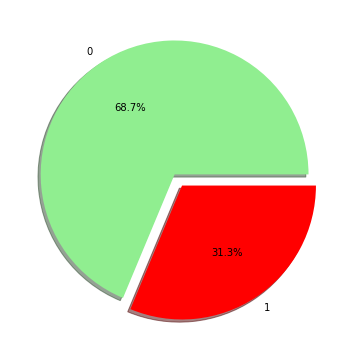

In [53]:
diabetes_class = df['class'].value_counts()
species = diabetes_class.index
count = diabetes_class.values

colors = ['lightgreen', 'red']
explode = ( 0, 0.1)
pyplot.figure(figsize=(6,12))
pyplot.pie(count, labels=species, shadow=True, colors=colors, explode=explode, autopct='%1.1f%%')
pyplot.show()